# Vector calculus

### Gauss Theorem in 2D

Consider a 2D velocity field
$$
\mathbf{v}(x,y) = x\,\mathbf{e}_x + y\,\mathbf{e}_y,
$$
which has a constant divergence
$$
\nabla \cdot \mathbf{v} = \frac{\partial x}{\partial x} + \frac{\partial y}{\partial y} = 1 + 1 = 2.
$$

According to Gauss’ theorem (or the divergence theorem), the flux of $\mathbf{v}$ through a closed surface $S$ (the boundary of a region $V$) is equal to the volume integral of the divergence over $V$:
$$
\int_S \mathbf{v} \cdot \mathbf{n}\,dS = \iint_V (\nabla \cdot \mathbf{v})\,dV.
$$

For example, let $S$ be the boundary of a unit circle centered at the origin. We will work with magnitudes per unit span. Thus, surface areas will become perimeters and volumes will become areas. Parameterizing the circle as
$$
x = \cos \theta,\quad y = \sin \theta,\quad \theta\in[0,2\pi],
$$
the outward unit normal is
$$
\mathbf{n} = (\cos\theta,\sin\theta),
$$
and the dot product $\mathbf{v}\cdot\mathbf{n}$ on $S$ becomes
$$
(\cos\theta,\sin\theta)\cdot(\cos\theta,\sin\theta)=1.
$$

Thus, the flux via the line integral is (recall $dS = r d\theta$, where $r = 1$ in this example):
$$
\int_S \mathbf{v}\cdot\mathbf{n}\,dS = \int_0^{2\pi} 1\,d\theta = 2\pi.
$$

On the other hand, the area of the unit circle is $\pi$, so the area integral yields
$$
\iint_V 2\,dV = 2\pi.
$$

Both approaches give the same result, illustrating Gauss’ theorem in 2D.


Flux through boundary (line integral): 6.289474781961547
Flux via area integral: 6.283185307179586


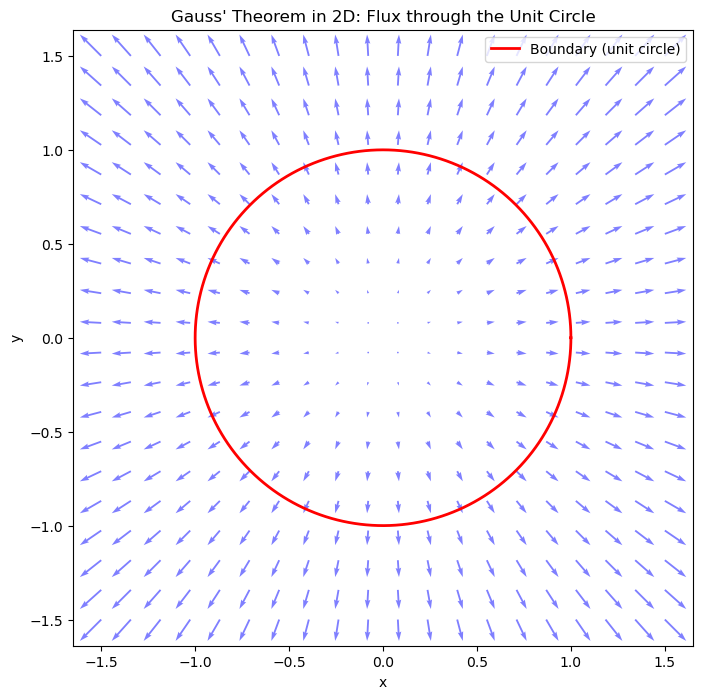

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Define the unit circle parameterization
theta = np.linspace(0, 2*np.pi, 1000)
x = np.cos(theta)
y = np.sin(theta)

# On the boundary, the vector field is v = (x, y) and the outward unit normal is n = (cos(theta), sin(theta))
# Hence, the dot product v . n = cos^2(theta) + sin^2(theta) = 1.
dot_vn = np.ones_like(theta)

# Differential arc length on a circle of radius 1: ds = dtheta (since R=1)
dtheta = theta[1] - theta[0]
flux_boundary = np.sum(dot_vn) * dtheta

# Alternatively, the divergence of v is 2 and the area of the unit circle is pi, so the area integral is:
flux_area = 2 * np.pi

print("Flux through boundary (line integral):", flux_boundary)
print("Flux via area integral:", flux_area)

# Plot the vector field and the unit circle
plt.figure(figsize=(8,8))

# Create a grid for the vector field
xg = np.linspace(-1.5, 1.5, 20)
yg = np.linspace(-1.5, 1.5, 20)
X, Y = np.meshgrid(xg, yg)
U = X  # v_x = x
V = Y  # v_y = y
plt.quiver(X, Y, U, V, color='blue', alpha=0.5)

# Plot the unit circle boundary
plt.plot(x, y, 'r-', lw=2, label='Boundary (unit circle)')

plt.xlabel("x")
plt.ylabel("y")
plt.title("Gauss' Theorem in 2D: Flux through the Unit Circle")
plt.legend(loc='upper right')
plt.axis('equal')
# plt.grid(True)
plt.show()


### Fundamental Theorem for Line Integrals

For a conservative vector field
$$
\mathbf{F}(x,y)=\nabla\phi(x,y),
$$
the line integral from point \(A\) to point \(B\) is given by
$$
\int_C \mathbf{F}\cdot d\mathbf{r} = \phi(B)-\phi(A),
$$
and is independent of the chosen path \(C\).

For example, let
$$
\phi(x,y)=x^2+y^2,
$$
so that
$$
\mathbf{F}(x,y)=(2x,2y).
$$

We will verify this by computing the line integral along two different paths from
$$
A=(-1,0) \quad \text{to} \quad B=(1,2).
$$

The expected value is:
$$
\phi(1,2)-\phi(-1,0)= (1^2+2^2)-((-1)^2+0^2)=5-1=4.
$$

⚠️ **Warning**: Note that I am rendering LaTeX for a more elegant output. Please comment lines with `rcParams` if you don't have a TeX distribution installed in your machine.



Potential difference phi(B)-phi(A): 4
Line integral along straight path : 3.999999999999999
Line integral along piecewise path: 4.000000000000001


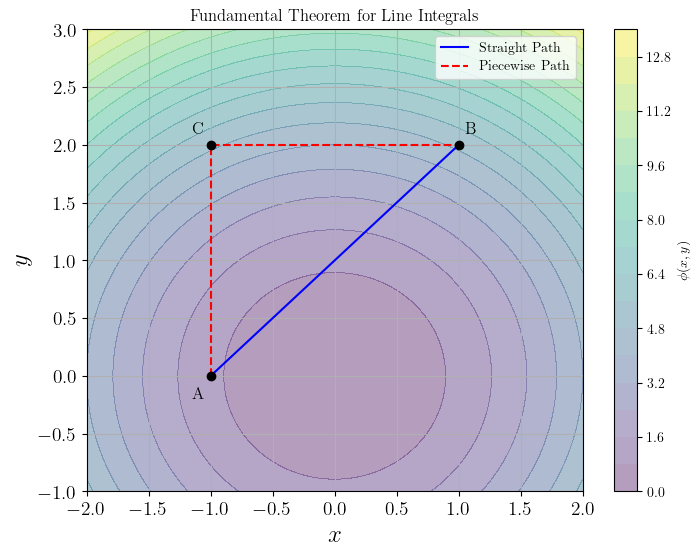

In [23]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['font.family'] = 'serif'
matplotlib.rcParams['text.usetex'] = True
matplotlib.rcParams['text.latex.preamble'] = r'\usepackage{amsmath}' # This compiles basic mathematical formulas


# Define the potential function
phi = lambda x, y: x**2 + y**2

# Define endpoints A, B, and intermediate point C for the piecewise path
A = np.array([-1, 0])
B = np.array([1, 2])
C = np.array([-1, 2])

# Compute the expected potential difference
phi_diff = phi(B[0], B[1]) - phi(A[0], A[1])
print("Potential difference phi(B)-phi(A):", phi_diff)

# --- Path 1: Straight line from A to B ---
t = np.linspace(0, 1, 1000)
x1 = A[0] + (B[0] - A[0]) * t
y1 = A[1] + (B[1] - A[1]) * t

# --- Path 2: Piecewise path A -> C -> B ---
# Segment A to C
t_seg1 = np.linspace(0, 1, 500)
x_seg1 = A[0] + (C[0] - A[0]) * t_seg1
y_seg1 = A[1] + (C[1] - A[1]) * t_seg1
# Segment C to B
t_seg2 = np.linspace(0, 1, 500)
x_seg2 = C[0] + (B[0] - C[0]) * t_seg2
y_seg2 = C[1] + (B[1] - C[1]) * t_seg2

# Show the alternative computations of the flux:
print("Line integral along straight path :", line_integral1)
print("Line integral along piecewise path:", line_integral2)

# --- Create grid for contour plot of phi ---
x_contour = np.linspace(-2, 2, 200)
y_contour = np.linspace(-1, 3, 200)
X, Y = np.meshgrid(x_contour, y_contour)
Z = phi(X, Y)

# Plot the isocontours of phi, the paths, and the points
plt.figure(figsize=(8, 6))

# Plot filled contour of the potential
contours = plt.contourf(X, Y, Z, levels=20, cmap='viridis', alpha=0.4)
plt.colorbar(contours, label='$\\phi(x,y)$')

# Plot the straight path (blue solid line)
plt.plot(x1, y1, 'b-', label='Straight Path')
# Plot the piecewise path (red dashed line)
plt.plot(np.concatenate([x_seg1, x_seg2]), np.concatenate([y_seg1, y_seg2]), 'r--', label='Piecewise Path')

# Plot the points A, B, and C
plt.scatter([A[0], B[0], C[0]], [A[1], B[1], C[1]], color='k', zorder=5)
plt.text(A[0] - 0.15, A[1] - 0.2, 'A', fontsize=12)
plt.text(B[0] + 0.05, B[1] + 0.1, 'B', fontsize=12)
plt.text(C[0] - 0.15, C[1] + 0.1, 'C', fontsize=12)

plt.xlabel('$x$',fontsize=18)
plt.ylabel('$y$',fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.title('Fundamental Theorem for Line Integrals',fontsize=12)
plt.legend()
plt.grid(True)
plt.show()


### Vector Triple Product Identity

The vector triple product identity is an important result in vector algebra. It states that for any vectors
$$
\mathbf{A},\; \mathbf{B},\; \text{and}\; \mathbf{C},
$$
the following holds:
$$
\mathbf{A}\times(\mathbf{B}\times \mathbf{C}) = (\mathbf{A}\cdot \mathbf{C})\,\mathbf{B} - (\mathbf{A}\cdot \mathbf{B})\,\mathbf{C}.
$$

This identity is very useful for simplifying expressions involving cross products and appears in many applications in physics and engineering. In the next cell, we will verify this identity using **symbolic computation** in Python.


In [17]:
import sympy as sp

# Define symbols for vector components
A1, A2, A3, B1, B2, B3, C1, C2, C3 = sp.symbols('A1 A2 A3 B1 B2 B3 C1 C2 C3')

# Define the vectors A, B, and C as column matrices
A = sp.Matrix([A1, A2, A3])
B = sp.Matrix([B1, B2, B3])
C = sp.Matrix([C1, C2, C3])

# Compute the left-hand side: A x (B x C)
LHS = A.cross(B.cross(C))

# Compute the right-hand side: (A · C) B - (A · B) C
RHS = (A.dot(C)) * B - (A.dot(B)) * C

# Simplify the difference LHS - RHS
identity_diff = sp.simplify(LHS - RHS)

# Display the result
print("The difference (LHS - RHS) is:")
sp.pprint(identity_diff)

if identity_diff == sp.zeros(3, 1):
    print("\nThe vector triple product identity is verified!")
else:
    print("\nThere is an error in the verification.")


The difference (LHS - RHS) is:
⎡0⎤
⎢ ⎥
⎢0⎥
⎢ ⎥
⎣0⎦

The vector triple product identity is verified!


### Vector Laplacian Identity

For any sufficiently smooth vector field

$$
\mathbf{v}(x,y,z) = \bigl(f(x,y,z),\, g(x,y,z),\, h(x,y,z)\bigr),
$$

the vector Laplacian (applied component-wise) can be written as

$$
\nabla^2 \mathbf{v} = \nabla (\nabla\cdot \mathbf{v}) - \nabla\times (\nabla\times \mathbf{v}).
$$

In other words, if we define (only valid if Cartesian coordinates are used)
$$
\nabla^2 \mathbf{v} = \bigl(\Delta f,\; \Delta g,\; \Delta h\bigr),
$$
and compute the divergence, $\nabla\cdot \mathbf{v} = f_x + g_y + h_z$, then its gradient is
$$
\nabla(\nabla\cdot \mathbf{v}) = \Bigl(f_{xx}+g_{xy}+h_{xz},\; f_{xy}+g_{yy}+h_{yz},\; f_{xz}+g_{yz}+h_{zz}\Bigr).
$$

Also, the curl of $ \mathbf{v} $ is
$$
\nabla\times \mathbf{v} = \Bigl( h_y - g_z,\; f_z - h_x,\; g_x - f_y \Bigr),
$$
and taking the curl of that result, we get $\nabla\times(\nabla\times \mathbf{v})$.

This identity is often useful in electromagnetic theory, fluid dynamics, and other areas of physics. In the next cell, we verify this identity symbolically using Python.


In [22]:
import sympy as sp

# Define symbols for the independent variables
x, y, z = sp.symbols('x y z')

# Define arbitrary functions for the components of the vector field
f = sp.Function('f')(x, y, z)
g = sp.Function('g')(x, y, z)
h = sp.Function('h')(x, y, z)

# Define the vector field v = (f, g, h)
v = sp.Matrix([f, g, h])

# Compute the Laplacian of each component (vector Laplacian)
lap_f = sp.diff(f, x, 2) + sp.diff(f, y, 2) + sp.diff(f, z, 2)
lap_g = sp.diff(g, x, 2) + sp.diff(g, y, 2) + sp.diff(g, z, 2)
lap_h = sp.diff(h, x, 2) + sp.diff(h, y, 2) + sp.diff(h, z, 2)
laplacian_v = sp.Matrix([lap_f, lap_g, lap_h])

# Compute divergence of v: div(v) = f_x + g_y + h_z
div_v = sp.diff(f, x) + sp.diff(g, y) + sp.diff(h, z)

# Compute gradient of divergence: grad(div v)
grad_div_v = sp.Matrix([sp.diff(div_v, x), sp.diff(div_v, y), sp.diff(div_v, z)])

# Compute curl of v: curl(v) = (h_y - g_z, f_z - h_x, g_x - f_y)
curl_v = sp.Matrix([sp.diff(h, y) - sp.diff(g, z),
                      sp.diff(f, z) - sp.diff(h, x),
                      sp.diff(g, x) - sp.diff(f, y)])

# Compute curl of curl(v)
curl_curl_v = sp.Matrix([sp.diff(curl_v[2], y) - sp.diff(curl_v[1], z),
                         sp.diff(curl_v[0], z) - sp.diff(curl_v[2], x),
                         sp.diff(curl_v[1], x) - sp.diff(curl_v[0], y)])

# Right-hand side of the identity: grad(div v) - curl(curl v)
rhs = grad_div_v - curl_curl_v

# Compute the difference between the left-hand side (vector Laplacian) and the right-hand side
difference = sp.simplify(laplacian_v - rhs)

print("\nIf the identity holds, the difference should be the zero vector...\n")
sp.pprint(difference)



If the identity holds, the difference should be the zero vector...

⎡0⎤
⎢ ⎥
⎢0⎥
⎢ ⎥
⎣0⎦
